## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

## Load the dataset

In [3]:
df=pd.read_csv("Heart.csv")

## Analyze the dataset

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,NaN,214.0,0.0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0


In [5]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110.0,264.0,0.0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1.0,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0.0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0.0,LVH,174.0,N,0.0,Flat,1
917,38,M,NAP,138.0,175.0,0.0,Normal,173.0,N,0.0,Up,0


## Describe the dataset

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,917.000000,917.000000,917.000000,917.000000,918.000000,918.000000
mean,53.510893,132.390403,199.016358,0.233370,136.801527,0.887364,0.553377
std,9.432617,18.523331,109.246330,0.423206,25.473119,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Checking which columns contain null values

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         1
Cholesterol       1
FastingBS         1
RestingECG        0
MaxHR             1
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## info()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           917 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


In [9]:
df.shape

(918, 12)

Text(0, 0.5, 'Count')

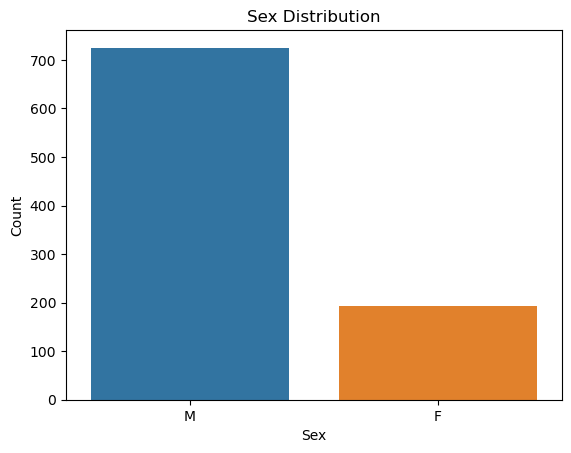

In [10]:
sns.countplot(data=df,x='Sex');
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

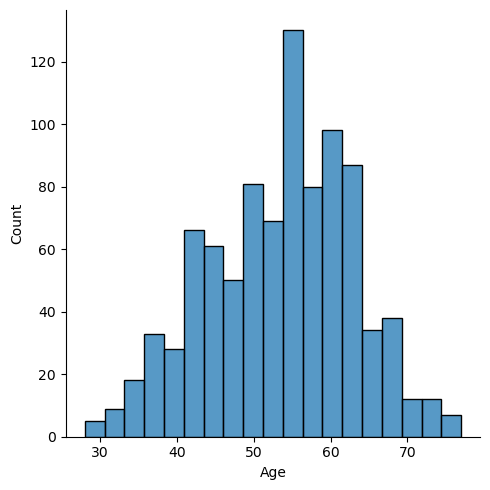

In [11]:
sns.displot(df['Age'])

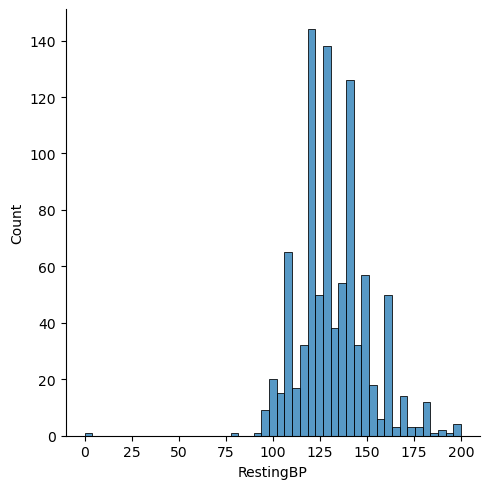

In [12]:
sns.displot(df['RestingBP'])

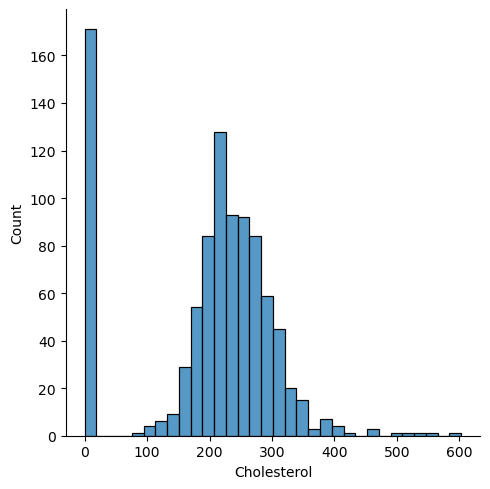

In [13]:
sns.displot(df['Cholesterol'])

## Duplicate Values

In [14]:
df_data=df.duplicated().any()

In [15]:
df_data

False

### label

In [16]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

# completing missing values & outlier

In [17]:
from sklearn.impute import SimpleImputer
numImputer=SimpleImputer(missing_values=np.nan, strategy="most_frequent")
numImputer=numImputer.fit(df[["RestingBP","Cholesterol","FastingBS","MaxHR"]])
new_df=numImputer.transform(df[["RestingBP","Cholesterol","FastingBS","MaxHR"]])
new_df

array([[140., 289.,   0., 172.],
       [160., 180.,   0., 156.],
       [130., 283.,   0.,  98.],
       ...,
       [130., 131.,   0., 115.],
       [130., 236.,   0., 174.],
       [138., 175.,   0., 173.]])

In [18]:
df[["RestingBP","Cholesterol","FastingBS","MaxHR"]]=new_df
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,120.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0.0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1.0,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0.0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0.0,LVH,174.0,N,0.0,Flat,1


### outlier

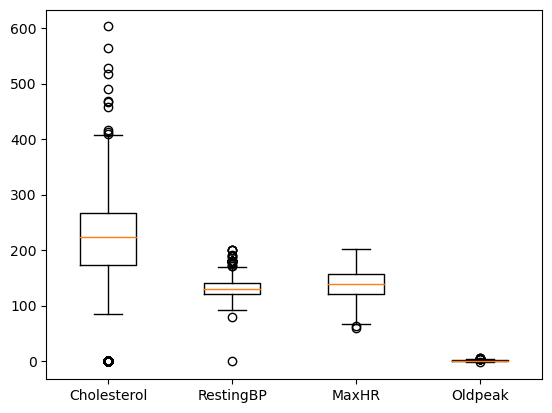

In [19]:
plt.boxplot(x=[df["Cholesterol"],df["RestingBP"],df["MaxHR"],df["Oldpeak"]])
plt.xticks([1,2,3,4],["Cholesterol","RestingBP","MaxHR","Oldpeak"])
plt.show()

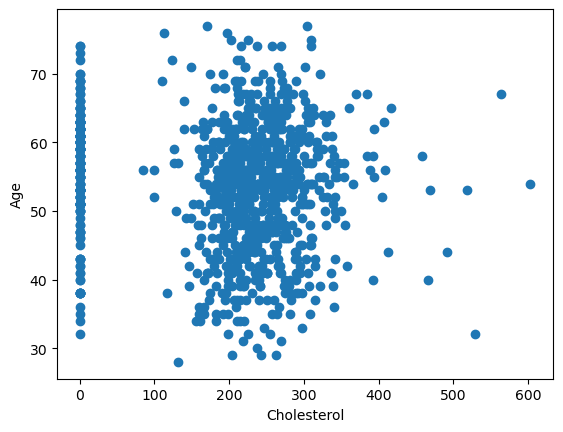

In [20]:
plt.scatter(df["Cholesterol"],df["Age"])
plt.xlabel("Cholesterol")
plt.ylabel("Age")
plt.show()

In [21]:
df = df.drop(df[(df['RestingBP'] == 0)].index)

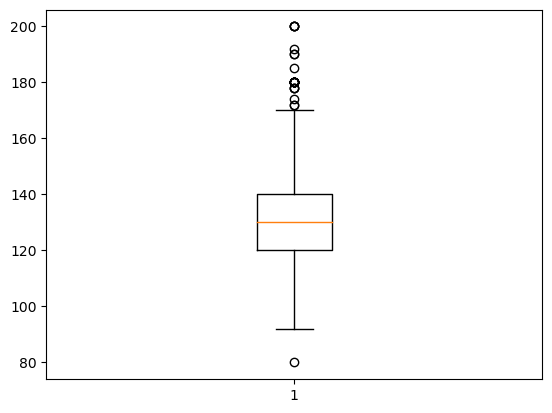

In [22]:
plt.boxplot(df["RestingBP"])
plt.show()

In [23]:
df.loc[df['Cholesterol'] == 0,'Cholesterol'] = np.nan


In [24]:
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [25]:
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())
df["Cholesterol"]

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 917, dtype: float64

# encoder

#### Age

In [26]:
df["Sex"].value_counts()

M    724
F    193
Name: Sex, dtype: int64

In [27]:
df["Sex"]=df["Sex"].replace(["M","F"],[0,1])

####  ChestPainType

In [28]:
df["ChestPainType"].value_counts()

ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [29]:
df["ChestPainType"]=df["ChestPainType"].replace(["ASY","NAP","ATA","TA"],[0,1,2,3])

#### RestingECG

In [30]:
df["RestingECG"].value_counts()

Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [31]:
df["RestingECG"]=df["RestingECG"].replace(["Normal","LVH","ST"],[0,1,2])

#### ExerciseAngina

In [18]:
df["ExerciseAngina"].value_counts()

N    546
Y    371
Name: ExerciseAngina, dtype: int64

In [19]:
df["ExerciseAngina"]=df["ExerciseAngina"].replace(["N","Y"],[0,1])

#### ST_Slope

In [20]:
df["ST_Slope"].value_counts()

Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [21]:
df["ST_Slope"]=df["ST_Slope"].replace(["Flat","Up","Down"],[0,1,2])

In [22]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140.0,289.0,0.0,0,172.0,0,0.0,1,0
1,49,1,1,160.0,180.0,0.0,0,156.0,0,1.0,0,1
2,37,0,2,130.0,283.0,0.0,2,98.0,0,0.0,1,0
3,48,1,0,120.0,214.0,0.0,0,108.0,1,1.5,0,1
4,54,0,1,150.0,195.0,0.0,0,122.0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110.0,264.0,0.0,0,132.0,0,1.2,0,1
914,68,0,0,144.0,193.0,1.0,0,141.0,0,3.4,0,1
915,57,0,0,130.0,131.0,0.0,0,115.0,1,1.2,0,1
916,57,1,2,130.0,236.0,0.0,1,174.0,0,0.0,0,1


### corr

In [31]:
cor=df.corr()
cor

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055670,-0.165951,0.263665,0.045556,0.198170,0.210694,-0.381982,0.216017,0.258563,-0.093310,0.282012
Sex,-0.055670,1.000000,0.168437,-0.011538,0.111122,-0.120424,-0.038758,0.189516,-0.191226,-0.105444,0.066355,-0.305118
ChestPainType,-0.165951,0.168437,1.000000,-0.019763,-0.062737,-0.116564,-0.064901,0.343310,-0.416553,-0.245250,0.203046,-0.471846
RestingBP,0.263665,-0.011538,-0.019763,1.000000,0.086641,0.068410,0.115449,-0.108317,0.151708,0.173587,-0.092236,0.116984
Cholesterol,0.045556,0.111122,-0.062737,0.086641,1.000000,0.024851,0.010679,-0.001780,0.072751,0.054583,-0.076421,0.076262
FastingBS,0.198170,-0.120424,-0.116564,0.068410,0.024851,1.000000,0.120381,-0.131195,0.059988,0.053062,-0.044113,0.267994
RestingECG,0.210694,-0.038758,-0.064901,0.115449,0.010679,0.120381,1.000000,-0.092709,0.097755,0.100452,-0.020166,0.108440
MaxHR,-0.381982,0.189516,0.343310,-0.108317,-0.001780,-0.131195,-0.092709,1.000000,-0.369673,-0.160445,0.247979,-0.401137
ExerciseAngina,0.216017,-0.191226,-0.416553,0.151708,0.072751,0.059988,0.097755,-0.369673,1.000000,0.409494,-0.254216,0.495490
Oldpeak,0.258563,-0.105444,-0.245250,0.173587,0.054583,0.053062,0.100452,-0.160445,0.409494,1.000000,-0.096810,0.403638


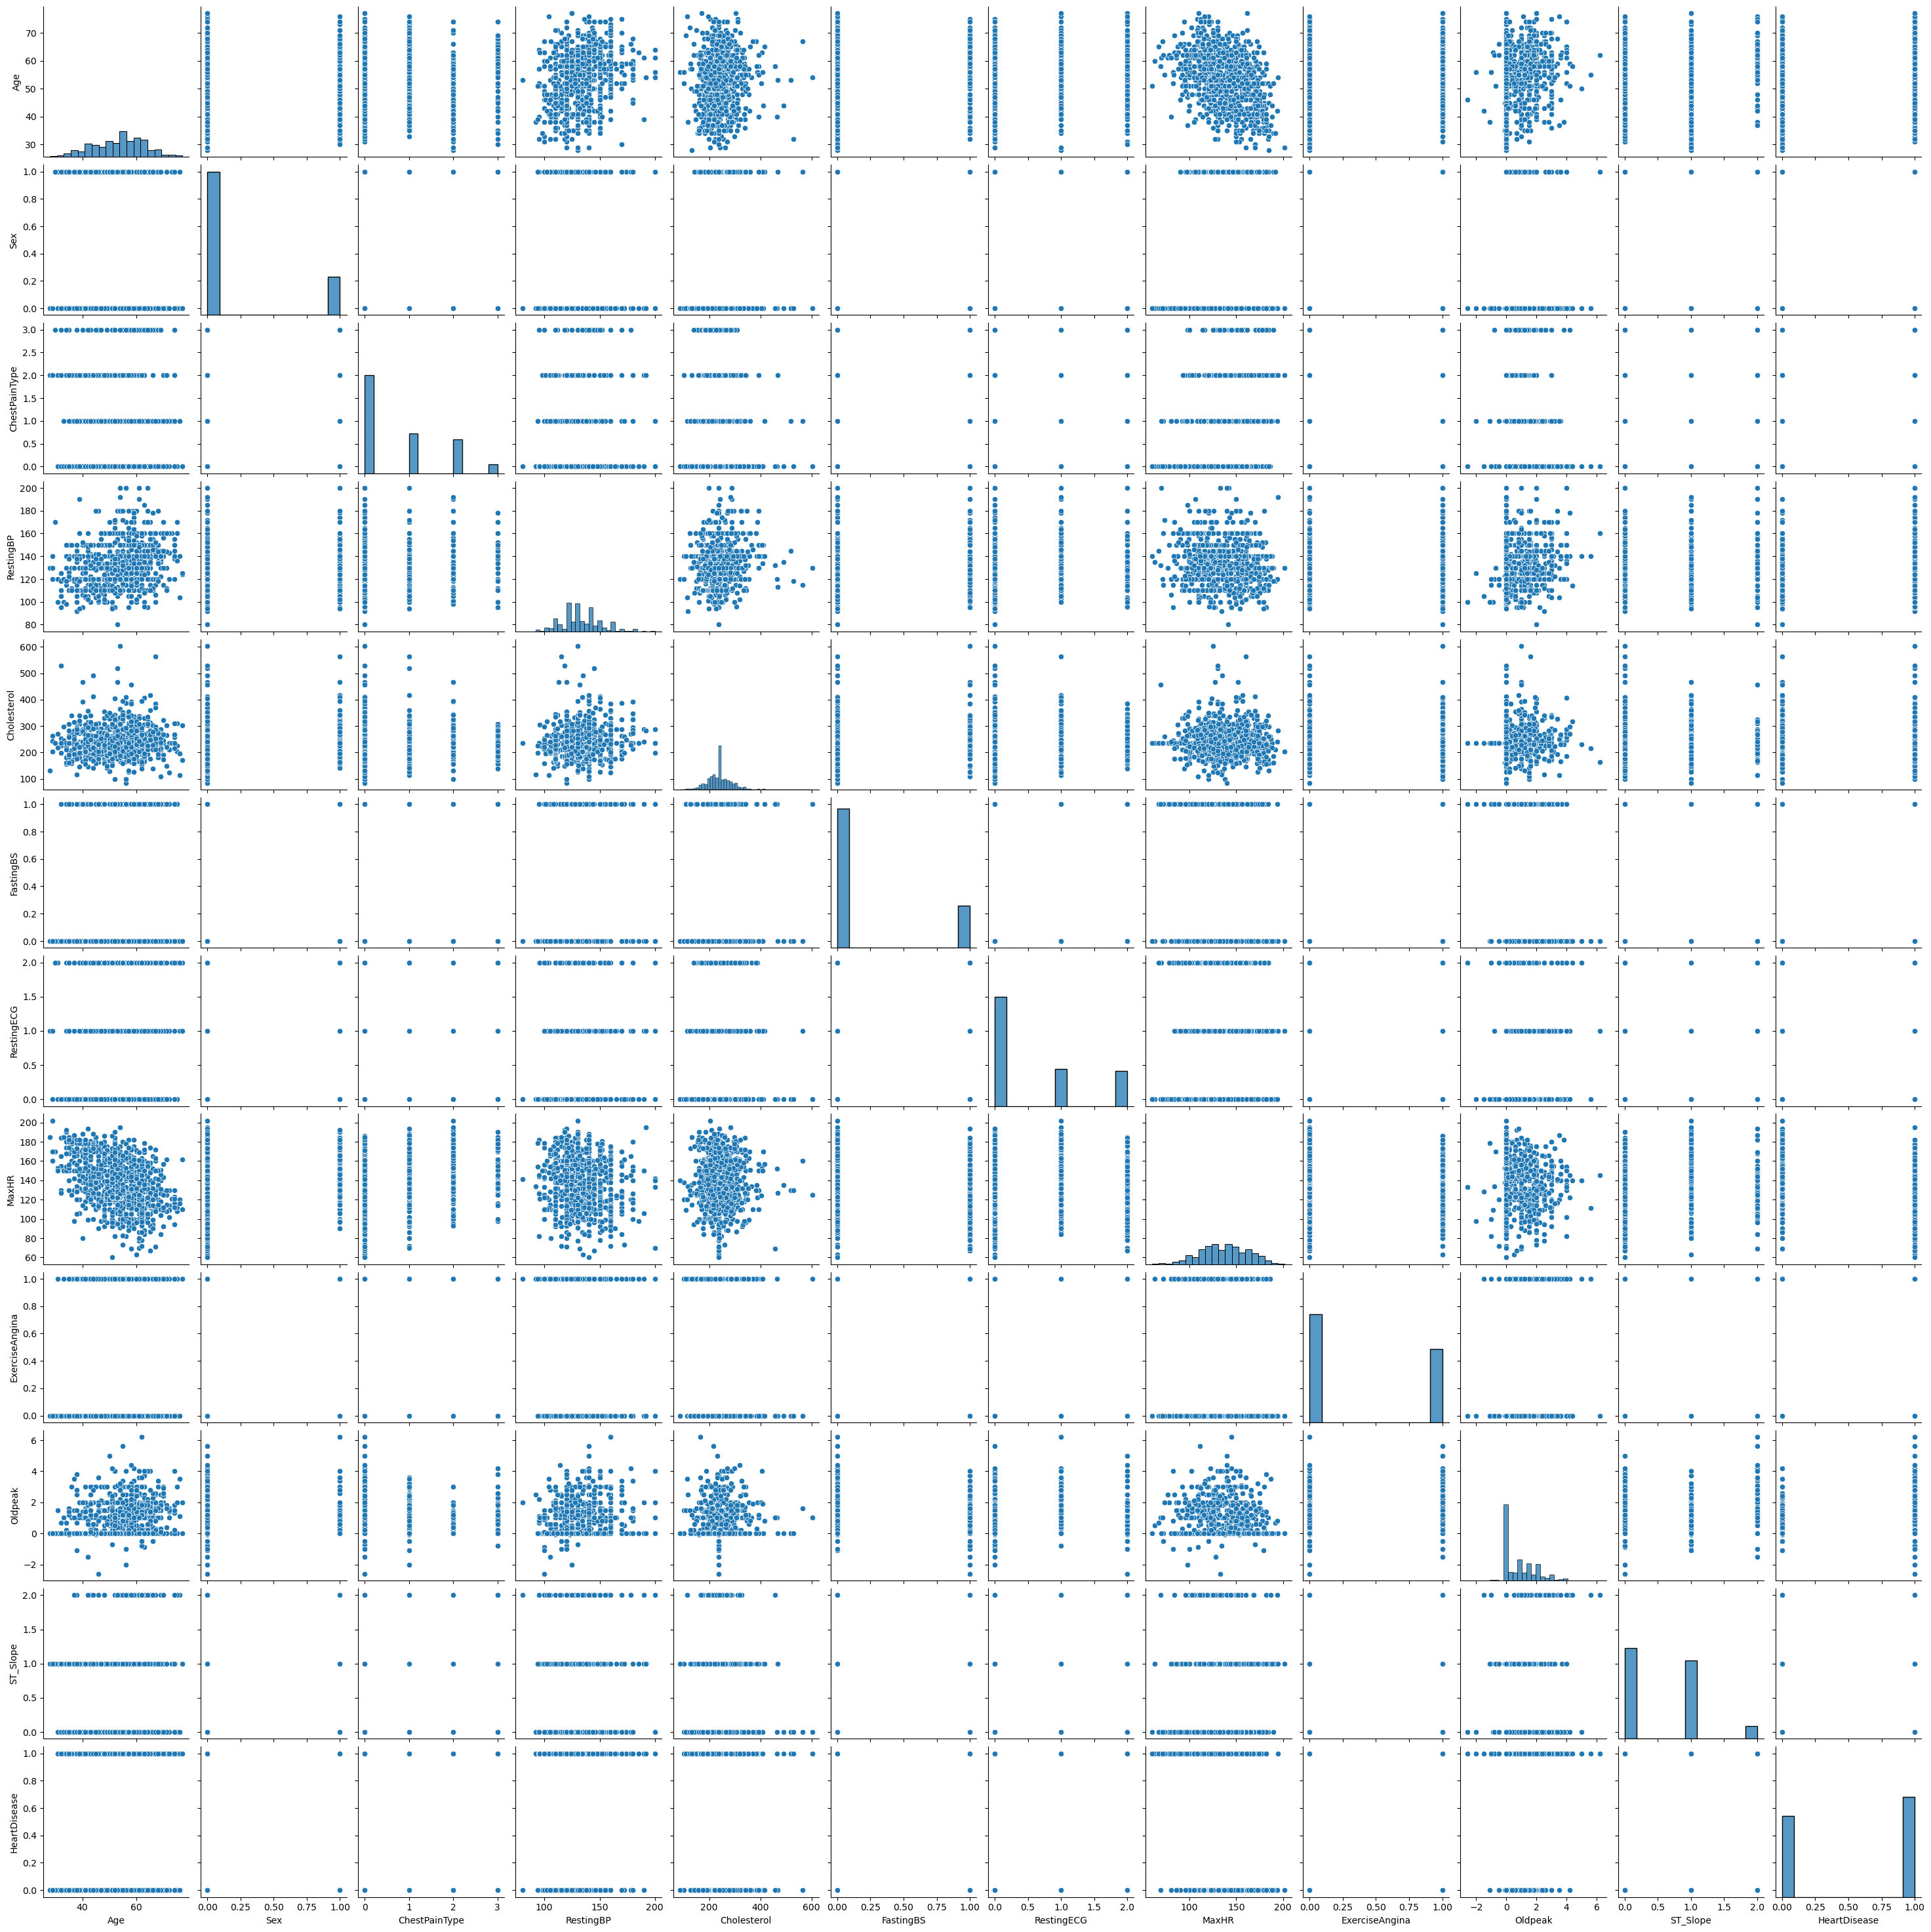

In [41]:
sns.pairplot(df)
plt.show()

## Standardization

In [31]:
from sklearn import preprocessing
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [32]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,2,140.0,289.0,0.0,0,172.0,0,0.0,1
1,49,1,1,160.0,180.0,0.0,0,156.0,0,1.0,0
2,37,0,2,130.0,283.0,0.0,2,98.0,0,0.0,1
3,48,1,0,120.0,214.0,0.0,0,108.0,1,1.5,0
4,54,0,1,150.0,195.0,0.0,0,122.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110.0,264.0,0.0,0,132.0,0,1.2,0
914,68,0,0,144.0,193.0,1.0,0,141.0,0,3.4,0
915,57,0,0,130.0,131.0,0.0,0,115.0,1,1.2,0
916,57,1,2,130.0,236.0,0.0,1,174.0,0,0.0,0


In [33]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 917, dtype: int64

# Split data

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.3 , random_state=0)
print("Train set",X_train.shape, y_train.shape)
print("Test set",X_test.shape, y_test.shape)

Train set (641, 11) (641,)
Test set (276, 11) (276,)


In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [36]:
X_train_s

array([[-2.26099369, -0.51894791, -0.82065891, ..., -0.83412661,
        -0.85419772, -0.89779876],
       [-1.84109019, -0.51894791,  0.22932584, ..., -0.83412661,
         0.09359653, -0.89779876],
       [-0.26645203, -0.51894791, -0.82065891, ..., -0.83412661,
         1.23094963, -0.89779876],
       ...,
       [ 1.83306551,  1.92697569, -0.82065891, ..., -0.83412661,
         0.66227308, -0.89779876],
       [ 0.0484756 , -0.51894791,  0.22932584, ..., -0.83412661,
        -0.66463887,  0.70971243],
       [ 0.78330674, -0.51894791, -0.82065891, ...,  1.19885877,
         2.55786158, -0.89779876]])

In [37]:
from sklearn.feature_selection import VarianceThreshold
variance_selector = VarianceThreshold(threshold=0)
X_train_fs = variance_selector.fit_transform(X_train_s)
X_test_fs = variance_selector.transform(X_test_s)
print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have beenremoved, {X_train_fs.shape[1]} features remain")

0 features have beenremoved, 11 features remain


In [38]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k='all')
X_train_fs1 = selector.fit_transform(X_train_s, y_train)
X_test_fs1 = selector.transform(X_test_s)
print(f"{X_train.shape[1]-X_train_fs1.shape[1]} features have beenremoved, {X_train_fs1.shape[1]} features remain")

0 features have beenremoved, 11 features remain


# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=11, metric="manhattan")
classifier.fit(X_train_fs, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [386]:
y_pred=classifier.predict(X_test_fs)
print(y_pred)

[1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0
 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0
 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1
 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1
 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0
 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1]


In [387]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print("accuracy:%.2f\n\n"%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print("confusion Matrix: ")
print(cm,"\n\n")
print("-------------------------------------------")
result=metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)

accuracy:0.87


confusion Matrix: 
[[103  18]
 [ 19 136]] 


-------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       121
           1       0.88      0.88      0.88       155

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



## other k

In [362]:
for k in range(1, 12):
    classifier = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
    classifier.fit(X_train_s, y_train)
    
    y_pred_train = classifier.predict(X_train_s) 
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    
    y_pred=classifier.predict(X_test_fs)
    accuracy_test = metrics.accuracy_score(y_test, y_pred)
    
    print(f"n_neighbors = {k},Train Accuracy = {accuracy_train:.2f}")
    print(f"n_neighbors = {k}, Test Accuracy = {accuracy_test:.2f}")
    print("")

n_neighbors = 1,Train Accuracy = 1.00
n_neighbors = 1, Test Accuracy = 0.84

n_neighbors = 2,Train Accuracy = 0.90
n_neighbors = 2, Test Accuracy = 0.79

n_neighbors = 3,Train Accuracy = 0.91
n_neighbors = 3, Test Accuracy = 0.85

n_neighbors = 4,Train Accuracy = 0.90
n_neighbors = 4, Test Accuracy = 0.83

n_neighbors = 5,Train Accuracy = 0.90
n_neighbors = 5, Test Accuracy = 0.84

n_neighbors = 6,Train Accuracy = 0.88
n_neighbors = 6, Test Accuracy = 0.85

n_neighbors = 7,Train Accuracy = 0.90
n_neighbors = 7, Test Accuracy = 0.84

n_neighbors = 8,Train Accuracy = 0.89
n_neighbors = 8, Test Accuracy = 0.83

n_neighbors = 9,Train Accuracy = 0.89
n_neighbors = 9, Test Accuracy = 0.84

n_neighbors = 10,Train Accuracy = 0.88
n_neighbors = 10, Test Accuracy = 0.86

n_neighbors = 11,Train Accuracy = 0.88
n_neighbors = 11, Test Accuracy = 0.87



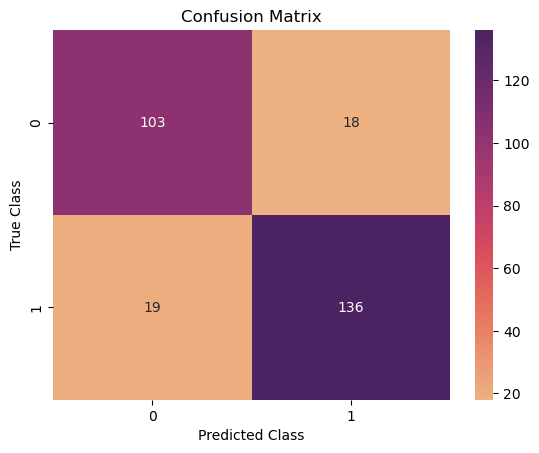

In [407]:
ax=sns.heatmap(cm, annot=True, fmt='d', cmap='flare')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier(criterion="gini", random_state=0)
tree_classifier.fit(X_train_fs, y_train)

DecisionTreeClassifier(random_state=0)

In [393]:
tree_y_pred=tree_classifier.predict(X_test_fs)
print(tree_y_pred)

[1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0
 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1
 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0
 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1]


In [394]:
from sklearn import metrics
tree_acc=metrics.accuracy_score(y_test, tree_y_pred)
print("accuracy:%.2f\n\n"%(tree_acc))
tree_cm=metrics.confusion_matrix(y_test,tree_y_pred)
print("confusion Matrix: ")
print(tree_cm,"\n\n")
print("-------------------------------------------")
tree_result=metrics.classification_report(y_test, tree_y_pred)
print("Classification Report:\n")
print(tree_result)

accuracy:0.80


confusion Matrix: 
[[ 98  23]
 [ 32 123]] 


-------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       121
           1       0.84      0.79      0.82       155

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276



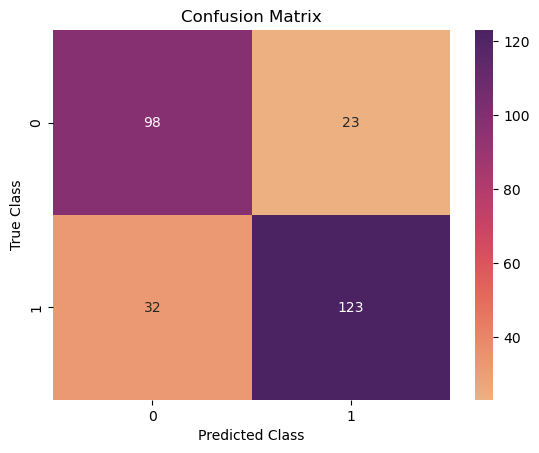

In [395]:
tree_ax=sns.heatmap(tree_cm, annot=True, fmt='d', cmap='flare')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.show()

## svm

In [41]:
from sklearn import svm
svm_classifier=svm.SVC(kernel="rbf")
svm_classifier.fit(X_train_fs, y_train)

SVC()

In [46]:
svm_y_pred=svm_classifier.predict(X_test_fs)
print(svm_y_pred)

[1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0
 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1
 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1
 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1]


In [47]:
from sklearn import metrics
svm_acc=metrics.accuracy_score(y_test, svm_y_pred)
print("accuracy:%.2f\n\n"%(svm_acc))
svm_cm=metrics.confusion_matrix(y_test,svm_y_pred)
print("confusion Matrix: ")
print(svm_cm,"\n\n")
print("-------------------------------------------")
svm_result=metrics.classification_report(y_test, svm_y_pred)
print("Classification Report:\n")
print(svm_result)

accuracy:0.88


confusion Matrix: 
[[102  19]
 [ 13 142]] 


-------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       121
           1       0.88      0.92      0.90       155

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



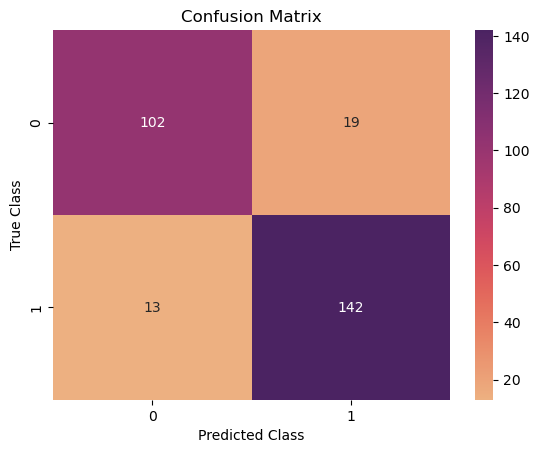

In [48]:
svm_ax=sns.heatmap(svm_cm, annot=True, fmt='d', cmap='flare')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.show()